In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ignore some useless warnings which makes things ugly:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
class PokemonSet(): 
    
    default_features = ["base_egg_steps","base_happiness","base_total","sp_attack"]
    
    def __init__(self, data, feature = default_features): 
        for f in feature:
            if type(f) not in [str]:
                raise TypeError(f"Each feature should be a string, but a {type(f)} is passed.")
        feature.append('is_legendary')  # add the label (is_legendary) to the data, in addition to the features
        self.feature = feature
        try:
            self.data = data[feature]
        except:
            raise ValueError("Invalid feature is passed to the function")
    def clean_data(self):
        '''
            Label-encodes the string features
            Convert NaN or non-numeric values in numeric features to the mean value of that feature
        Args:
            None
        Returns:
            None
        '''
        str_feature = ['abilities', 'classfication', 'japanese_name', 'name', 'type1', 'type2']
        for sf in str_feature:
            if sf in self.feature:
                LE = LabelEncoder()
                self.data[sf] = LE.fit_transform(self.data[sf])
        for f in self.feature:
            # convert non-numeric values to NaN
            for i in range(len(self.data[f])):
                try:
                    self.data[f][i] = float(self.data[f][i])
                except:
                    self.data[f][i] = np.nan
            # convert all NaN to mean of that feature
            for i in range(len(self.data[f])):
                if np.isnan(self.data[f][i]):
                    self.data[f][i] = float(np.nanmean(self.data[f],dtype='float64'))
            # ensure dtype of DataFrame to be float
            self.data[f] = self.data[f].astype('float64')
    
    def corr(self, absolute=True, plot=True, clim=[0,1]): 
        '''
            Get the correlation matrix between different features
        Kwargs:
            absolute (bool): default=True. Returning the absolute-value correlation matrix
            plot (bool): default=True. Plot the matrix
            clim ([cMin, cMax]): default=[0,1]. The range of colorbar
        Returns:
            corr_matrix (pd.DataFrame): The correlation matrix
        ''' 
        corr_matrix = self.data.corr(method='spearman')
        if absolute:
            corr_matrix = np.abs(corr_matrix)
        if plot:
            plt.figure(figsize=(10,10))
            plt.imshow(corr_matrix,cmap='Blues')
            plt.title("Correlation Matrix for Pokemon Dataset")
            plt.xticks(np.arange(len(self.feature)),self.feature,rotation=45)
            plt.yticks(np.arange(len(self.feature)),self.feature,rotation=45)
            plt.clim(clim)
            plt.colorbar()
            plt.show()
        return corr_matrix
        
   
    def split(self, test_size=0.3, random_state=42): 
        '''
            Split the dataset into train and test sets.
        Kwargs:
            test_size (float): the size of test set
            random_state (int): the random seed for random splitting
        Returns:
            X_train(pd.DataFrame): the features for train set
            X_test(pd.DataFrame): the features for test set
            y_train(pd.Series): the labels for train set
            y_test(pd.Series): the labels for test set
        '''
        X = self.data[self.feature[:-1]] # features
        y = self.data[self.feature[-1]]  # labels (is_legendary)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

In [3]:
df = pd.read_csv("pokemon.csv") 

In [4]:
ps = PokemonSet(data = df,feature = ["base_egg_steps","base_happiness","base_total","sp_attack","capture_rate"])

In [5]:
ps.data

,base_egg_steps,base_happiness,base_total,sp_attack,capture_rate,is_legendary
0,5120,70,318,65,45,0
1,5120,70,405,80,45,0
2,5120,70,625,122,45,0
3,5120,70,309,60,45,0
4,5120,70,405,80,45,0
...,...,...,...,...,...,...
796,30720,0,570,107,25,1
797,30720,0,570,59,255,1
798,30720,0,570,97,15,1
799,30720,0,600,127,3,1


In [6]:
ps.clean_data()

In [7]:
# the previous bad capture_rate data 
ps.data.iloc[773]

base_egg_steps    6400.00000
base_happiness      70.00000
base_total         500.00000
sp_attack          100.00000
capture_rate        98.76125
is_legendary         0.00000
Name: 773, dtype: float64

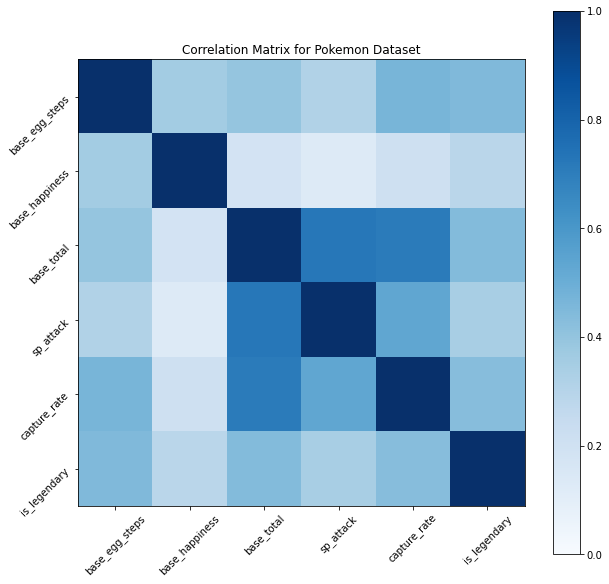

In [8]:
cc = ps.corr()

In [9]:
X_train, X_test, y_train, y_test = ps.split()

In [10]:
X_train

,base_egg_steps,base_happiness,base_total,sp_attack,capture_rate
523,3840.0,70.0,280.0,25.0,255.0
750,3840.0,70.0,269.0,40.0,200.0
426,5120.0,0.0,350.0,44.0,190.0
41,3840.0,70.0,455.0,65.0,90.0
495,5120.0,70.0,413.0,60.0,45.0
...,...,...,...,...,...
71,5120.0,70.0,335.0,50.0,190.0
106,6400.0,70.0,455.0,35.0,45.0
270,3840.0,70.0,340.0,60.0,120.0
435,5120.0,70.0,300.0,24.0,255.0


In [11]:
y_train

523    0.0
750    0.0
426    0.0
41     0.0
495    0.0
      ... 
71     0.0
106    0.0
270    0.0
435    0.0
102    0.0
Name: is_legendary, Length: 560, dtype: float64